### 신경망에서 정확도를 높이는 방법
- optimizer 방법의 적절한 사용 (adam optimaizer가 성능이 좋음)
- weight에 대한 초기값 설정
- drop out에 대한 사용 여부

In [1]:
# 뉴럴넷에서는 변수초기화
# 레이어 10개, 각 레이어에 있는 500개 뉴런이 있다고 가정

In [96]:
#1. small random number => 평균 0, 표준편차 0.01 가우시안 분포
import tensorflow as ft
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc={"axes.facecolor":"white", "axes.edgecolor":"black"})

### MNIST model based Weight Initialization

입력계층 평균 0.002633 and 표준편차 0.999400
히든 계층 1 평균 -0.000246 and 표준편차 0.720519
히든 계층 2 평균 -0.000674 and 표준편차 0.633954
히든 계층 3 평균 0.000734 and 표준편차 0.594694
히든 계층 4 평균 0.000326 and 표준편차 0.576818
히든 계층 5 평균 0.001263 and 표준편차 0.565604
히든 계층 6 평균 -0.000083 and 표준편차 0.561472
히든 계층 7 평균 -0.000716 and 표준편차 0.559427
히든 계층 8 평균 -0.000640 and 표준편차 0.557508
히든 계층 9 평균 0.000197 and 표준편차 0.555948
히든 계층 10 평균 0.000093 and 표준편차 0.554938


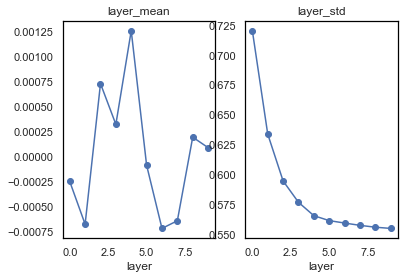

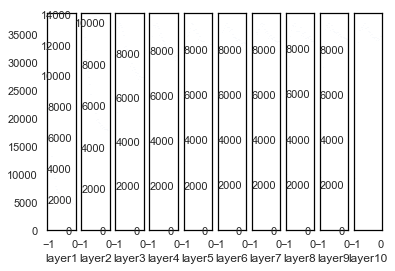

In [98]:
# hidden layer
np.random.seed(0)
D=np.random.randn(1000,500)
hidden_layer_sizes=[500]*10
Hs={}
for i in range(len(hidden_layer_sizes)):
    X=D if i == 0 else Hs[i-1] 
    fan_in=X.shape[1]
    fan_out=hidden_layer_sizes[i]
    #w=np.random.randn(fan_in,fan_out)*0.01
    
    #w=np.random.randn(fan_in,fan_out)
    # 평균 : 0, 표준편차 : 1
    
    #Xavier
    #w=np.random.randn(fan_in,fan_out)/np.sqrt(fan_in)
    
    #He 초기화
    w=np.random.randn(fan_in,fan_out)/np.sqrt(fan_in/2)
    
    H=np.dot(X,w)
    H=np.tanh(H)
    Hs[i]=H

print("입력계층 평균 %f and 표준편차 %f" % (np.mean(D),np.std(D)))
layer_means=[np.mean(H) for i,H in Hs.items()] # key, value 리턴
layer_stds=[np.std(H) for i,H in Hs.items()]

for i,H in Hs.items():
    print("히든 계층 %d 평균 %f and 표준편차 %f" % (i+1, layer_means[i], layer_stds[i]) )

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.xlabel('layer')
plt.title('layer_mean')

plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'ob-')
plt.xlabel('layer')
plt.title('layer_std')
# layer가 늘어날수록 가중치가 0에 가까워져 제대로 된 결과를 얻을 수 없음

plt.figure()
for i,H in Hs.items():
    plt.subplot(1,len(Hs),i+1)
    plt.hist(H.ravel(),30, range(-1,1))
    plt.xlabel('layer'+str(i+1))
plt.show()

### MNIST model based Xavier Initialization, adam optimaizer

In [37]:
import tensorflow as tf
import random

In [41]:
# 데이터 다운로드
from tensorflow.examples.tutorials.mnist import input_data

In [42]:
mnist=input_data.read_data_sets("MNIST_dat/", one_hot=True)

W0806 10:43:08.762048  3756 deprecation.py:323] From <ipython-input-42-a19ac35be874>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0806 10:43:08.763045  3756 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0806 10:43:08.785985  3756 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
I

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_dat/train-images-idx3-ubyte.gz


W0806 10:43:10.334871  3756 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0806 10:43:10.337863  3756 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_dat/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_dat/t10k-images-idx3-ubyte.gz


W0806 10:43:11.175595  3756 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_dat/t10k-labels-idx1-ubyte.gz


In [52]:
learning_rate=0.001
training_epochs=15
batch_size=100

In [53]:
tf.reset_default_graph() # 그래프에 있는 모든 텐서를 초기화
x=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10])
w1=tf.get_variable("w1",shape=[784,256], 
                   initializer=tf.contrib.layers.xavier_initializer())
b1=tf.Variable(tf.random_normal([256]))
L1=tf.nn.relu(tf.matmul(x,w1)+b1)

w2=tf.get_variable("w2",shape=[256,256], 
                   initializer=tf.contrib.layers.xavier_initializer())
b2=tf.Variable(tf.random_normal([256]))
L2=tf.nn.relu(tf.matmul(L1,w2)+b2)

w3=tf.get_variable("w3",shape=[256,10], 
                   initializer=tf.contrib.layers.xavier_initializer())
b3=tf.Variable(tf.random_normal([10]))
hf=tf.matmul(L2,w3)+b3

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hf, labels=y))
train=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [61]:
# Session() : 그래프의 외부에다가 정보를 전달하고 결과를 전달받는 객체
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batchxs,batchys=mnist.train.next_batch(batch_size)
        myfeed={x:batchxs, y:batchys}
        cv,_=sess.run([cost,train], feed_dict=myfeed)
        avg_cost+=cv/total_batch
    print('cost:',"{:.9f}".format(avg_cost))
c_pre=tf.equal(tf.argmax(hf,1), tf.argmax(y,1))
acc=tf.reduce_mean(tf.cast(c_pre, tf.float32))
print('acc:',sess.run(acc, feed_dict={x:mnist.test.images,y:mnist.test.labels}))

cost: 0.312081399
cost: 0.116982059
cost: 0.077431300
cost: 0.054931856
cost: 0.041989073
cost: 0.032318130
cost: 0.025749441
cost: 0.020619028
cost: 0.019430803
cost: 0.014511746
cost: 0.015046957
cost: 0.012085178
cost: 0.013383440
cost: 0.011098691
cost: 0.008622399
acc: 0.9782


In [62]:
tf.reset_default_graph() # 그래프에 있는 모든 텐서를 초기화
x=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10])
w1=tf.get_variable("w1",shape=[784,512], 
                   initializer=tf.contrib.layers.xavier_initializer())
b1=tf.Variable(tf.random_normal([512]))
L1=tf.nn.relu(tf.matmul(x,w1)+b1)

w2=tf.get_variable("w2",shape=[512,512], 
                   initializer=tf.contrib.layers.xavier_initializer())
b2=tf.Variable(tf.random_normal([512]))
L2=tf.nn.relu(tf.matmul(L1,w2)+b2)

w3=tf.get_variable("w3",shape=[512,512], 
                   initializer=tf.contrib.layers.xavier_initializer())
b3=tf.Variable(tf.random_normal([512]))
L3=tf.matmul(L2,w3)+b3

w4=tf.get_variable("w4",shape=[512,512], 
                   initializer=tf.contrib.layers.xavier_initializer())
b4=tf.Variable(tf.random_normal([512]))
L4=tf.matmul(L3,w4)+b4

w5=tf.get_variable("w5",shape=[512,10], 
                   initializer=tf.contrib.layers.xavier_initializer())
b5=tf.Variable(tf.random_normal([10]))
hf=tf.matmul(L4,w5)+b5

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hf, labels=y))
train=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [63]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batchxs,batchys=mnist.train.next_batch(batch_size)
        myfeed={x:batchxs, y:batchys}
        cv,_=sess.run([cost,train], feed_dict=myfeed)
        avg_cost+=cv/total_batch
    print('cost:',"{:.9f}".format(avg_cost))
c_pre=tf.equal(tf.argmax(hf,1), tf.argmax(y,1))
acc=tf.reduce_mean(tf.cast(c_pre, tf.float32))
print('acc:',sess.run(acc, feed_dict={x:mnist.test.images,y:mnist.test.labels}))

cost: 0.386988669
cost: 0.109556284
cost: 0.081815846
cost: 0.061580744
cost: 0.050836078
cost: 0.049948337
cost: 0.039125587
cost: 0.037024742
cost: 0.030255241
cost: 0.026078200
cost: 0.026522312
cost: 0.024514850
cost: 0.022708375
cost: 0.020056009
cost: 0.022944419
acc: 0.9765


### MNIST model based drop out (정확도 개선)

In [64]:
tf.reset_default_graph() # 그래프에 있는 모든 텐서를 초기화
x=tf.placeholder(tf.float32,[None,784])
y=tf.placeholder(tf.float32,[None,10])

keep_prob=tf.placeholder(tf.float32)

w1=tf.get_variable("w1",shape=[784,512], 
                   initializer=tf.contrib.layers.xavier_initializer())
b1=tf.Variable(tf.random_normal([512]))
L1=tf.nn.relu(tf.matmul(x,w1)+b1)
L1=tf.nn.dropout(L1, keep_prob=keep_prob)

w2=tf.get_variable("w2",shape=[512,512], 
                   initializer=tf.contrib.layers.xavier_initializer())
b2=tf.Variable(tf.random_normal([512]))
L2=tf.nn.relu(tf.matmul(L1,w2)+b2)
L2=tf.nn.dropout(L1, keep_prob=keep_prob)

w3=tf.get_variable("w3",shape=[512,512], 
                   initializer=tf.contrib.layers.xavier_initializer())
b3=tf.Variable(tf.random_normal([512]))
L3=tf.matmul(L2,w3)+b3
L3=tf.nn.dropout(L1, keep_prob=keep_prob)

w4=tf.get_variable("w4",shape=[512,512], 
                   initializer=tf.contrib.layers.xavier_initializer())
b4=tf.Variable(tf.random_normal([512]))
L4=tf.matmul(L3,w4)+b4
L4=tf.nn.dropout(L1, keep_prob=keep_prob)

w5=tf.get_variable("w5",shape=[512,10], 
                   initializer=tf.contrib.layers.xavier_initializer())
b5=tf.Variable(tf.random_normal([10]))
hf=tf.matmul(L4,w5)+b5

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hf, labels=y))
train=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

W0806 11:32:17.337381  3756 deprecation.py:506] From <ipython-input-64-c51ad62513da>:11: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [66]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batchxs,batchys=mnist.train.next_batch(batch_size)
        myfeed={x:batchxs, y:batchys, keep_prob:0.7} # 모델을 만들때는 데이터 일부만 사용
        cv,_=sess.run([cost,train], feed_dict=myfeed)
        avg_cost+=cv/total_batch
    print('cost:',"{:.9f}".format(avg_cost))
    
c_pre=tf.equal(tf.argmax(hf,1), tf.argmax(y,1))
acc=tf.reduce_mean(tf.cast(c_pre, tf.float32))
print('acc:',sess.run(acc, feed_dict={x:mnist.test.images,y:mnist.test.labels,
                                     keep_prob:1})) # 실행할때는 데이터 전체 다 넣기

cost: 0.406567472
cost: 0.190769465
cost: 0.145896703
cost: 0.120771590
cost: 0.099910253
cost: 0.088721167
cost: 0.082401597
cost: 0.071309973
cost: 0.066305334
cost: 0.062579497
cost: 0.055251075
cost: 0.052487950
cost: 0.047235383
cost: 0.049177391
cost: 0.045206500
acc: 0.9812


### MNIST model based CNN

In [88]:
learning_rate=0.001
training_epochs=15
batch_size=100

In [93]:
tf.reset_default_graph() # 그래프에 있는 모든 텐서를 초기화
x=tf.placeholder(tf.float32,[None, 28*28])
ximg=tf.reshape(x,[-1,28,28,1]) # image 28*28*1(black/white)
y=tf.placeholder(tf.float32,[None,10])

w1=tf.Variable(tf.random_normal([3,3,1,32])) # (3,3) 필터가 32개 있다는 의미
L1=tf.nn.conv2d(ximg, w1, strides=[1, 1, 1 ,1], padding='SAME') # 오른쪽으로 1칸씩 아래로 1줄씩 이동
# 컨볼루션해도 동일한 크기로 유지되도록 옵션 설정 (padding='SAME')
L1=tf.nn.relu(L1)
L1=tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
#L1 이미지 shape => (?, 28, 28, 1)
#conv => (?, 28, 28, 32)
#pooling => (?, 14, 14, 32)

w2=tf.Variable(tf.random_normal([3,3,32,64]))
L2=tf.nn.conv2d(L1, w2, strides=[1, 1, 1 ,1], padding='SAME') 
L2=tf.nn.relu(L2)
L2=tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
# conv2d (?, 14, 14, 64)
# relu (?, 14, 14, 64)
# max_pool (?,7,7,64)
L2_flat=tf.reshape(L2,[-1,7*7*64])
# reshape => (?, 7*7*64)

w3=tf.get_variable("w3", shape=[7*7*64,10], 
                   initializer=tf.contrib.layers.xavier_initializer())
b=tf.Variable(tf.random_normal([10]))
logits=tf.matmul(L2_flat,w3)+b

cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [94]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batchxs,batchys=mnist.train.next_batch(batch_size)
        myfeed={x:batchxs, y:batchys} # 모델을 만들때는 데이터 일부만 사용
        cv,_=sess.run([cost,train], feed_dict=myfeed)
        avg_cost+=cv/total_batch
    print('cost:',"{:.9f}".format(avg_cost))
    
c_pre=tf.equal(tf.argmax(logits,1), tf.argmax(y,1))
acc=tf.reduce_mean(tf.cast(c_pre, tf.float32))
print('acc:',sess.run(acc, feed_dict={x:mnist.test.images,
                                      y:mnist.test.labels})) # 실행할때는 데이터 전체 다 넣기

cost: 0.815843063
cost: 0.202074517
cost: 0.121881531
cost: 0.089588703
cost: 0.062290747
cost: 0.044868738
cost: 0.037517335
cost: 0.031994912
cost: 0.024724429
cost: 0.018475310
cost: 0.015445709
cost: 0.025519866
cost: 0.011797346
cost: 0.011808687
cost: 0.012463912
acc: 0.9842


In [91]:
tf.reset_default_graph() 
x = tf.placeholder(tf.float32, [None, 28*28])
ximg = tf.reshape(x, [-1, 28, 28, 1]) # 28*28*1 = channer(black/white)
y = tf.placeholder(tf.float32, [None, 10])

# 1계층
w1 = tf.Variable(tf.random_normal([3, 3, 1, 32])) # 3x3x1필터 32개 [행, 열, 깊이, 개수]
# strides = [1, 좌우, 위아래, 1] 양쪽 끝은 1로 고정
L1 = tf.nn.conv2d(ximg, w1, strides=[1, 1, 1, 1], padding="SAME") 
L1 = tf.nn.relu(L1)
# ksize=[1, 2, 2, 1] → 2x2사이즈로 pooling 양쪽은 1로 고정
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME") # max pooling 사용 
# L1 이미지 shpape (?, 28, 28, 1)
# conv → (?, 28, 28, 32)
# pooling → (?, 14, 14, 32)

# 2계층
w2 = tf.Variable(tf.random_normal([3, 3, 32, 64])) # 필터 32개를 사용하여서 입력값이 32개
L2 = tf.nn.conv2d(L1, w2, strides=[1, 1, 1, 1], padding="SAME") 
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME") 
L2_flat = tf.reshape(L2, [-1, 7*7*64])
# → conv2d → (?, 14, 14, 64) → relu 
# → (?, 14, 14, 64) → pooling → (?, 7, 7, 64)
# → reshape → (?, 7*7*64)

# NN
w3 = tf.get_variable("w3", shape=[7*7*64, 10], 
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, w3)+b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [92]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batchexs, batchys = mnist.train.next_batch(batch_size)
        myfeed = {x: batchexs, y: batchys}
        cv, _ = sess.run([cost, train], feed_dict=myfeed)
        avg_cost += cv/total_batch
        
    print("cost", "{:.9f}".format(avg_cost))
c_pre = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
acc = tf.reduce_mean(tf.cast(c_pre, tf.float32))
print("acc", sess.run(acc, feed_dict={x: mnist.test.images, 
                                      y: mnist.test.labels}))

cost 0.700799880
cost 0.178932065
cost 0.105570726
cost 0.072997451
cost 0.060080311
cost 0.036563061
cost 0.026023293
cost 0.022456735
cost 0.024046551
cost 0.021878858
cost 0.017144067
cost 0.013556032
cost 0.010704234
cost 0.012570874
cost 0.010403926
acc 0.9823
